<a href="https://colab.research.google.com/github/CAR-Driving/yoloOnGoogleColab/blob/master/Kitti_Database_Downloding_and_Converting_to_XML_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## inserting the KITTI - Object Detection
Detect and localize multiple Classes in images
 
KITTI Object Detection with Bounding Boxes – Taken from the benchmark suite from the Karlsruhe Institute of Technology, this dataset consists of images from the object detection section of that suite. This image dataset includes over 14,000 images made up of 7,518 testing images and 7,481 training images with bounding boxes labels in a separate file.
 
https://www.kaggle.com/twaldo/kitti-object-detection

# First of all get The **kaggle.json** file from this link, as you can see blowe:


```
*   https://www.kaggle.com/<your Account)/account

```



![enter image description here](https://i.stack.imgur.com/Uz4KW.png)

Then Upload the **kaggle.json** by Blow code:


In [2]:
from google.colab import files
files.upload()
 
!mkdir -p ~/.kaggle
 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 
 
!pip install kaggle 
#!sudo apt install kaggle 
!kaggle datasets download -d twaldo/kitti-object-detection

Saving kaggle.json to kaggle.json
100% 11.5G/11.5G [03:05<00:00, 21.0MB/s]
100% 11.5G/11.5G [03:05<00:00, 66.6MB/s]


Saving kaggle.json to kaggle (1).json
kitti-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


## Location of the Images:
![enter image description here](https://i.stack.imgur.com/BBEfj.jpg)






In [3]:
!ls
!unzip kitti-object-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: kitti_single/training/label_2/002483.txt  
  inflating: kitti_single/training/label_2/002484.txt  
  inflating: kitti_single/training/label_2/002485.txt  
  inflating: kitti_single/training/label_2/002486.txt  
  inflating: kitti_single/training/label_2/002487.txt  
  inflating: kitti_single/training/label_2/002488.txt  
  inflating: kitti_single/training/label_2/002489.txt  
  inflating: kitti_single/training/label_2/002490.txt  
  inflating: kitti_single/training/label_2/002491.txt  
  inflating: kitti_single/training/label_2/002492.txt  
  inflating: kitti_single/training/label_2/002493.txt  
  inflating: kitti_single/training/label_2/002494.txt  
  inflating: kitti_single/training/label_2/002495.txt  
  inflating: kitti_single/training/label_2/002496.txt  
  inflating: kitti_single/training/label_2/002497.txt  
  inflating: kitti_single/training/label_2/002498.txt  
  inflating: kitti_single/training/label_2/002499.txt

# Seeing the Kitti databse contents

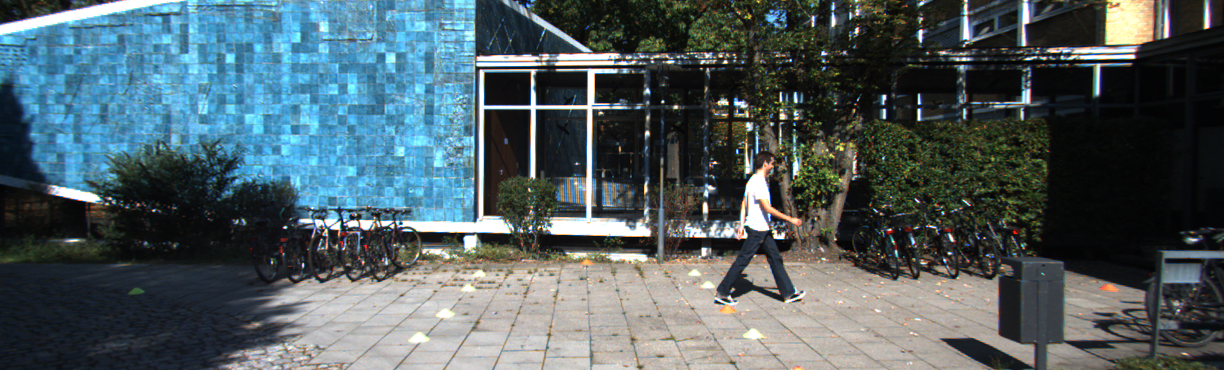

In [4]:
from IPython.display import Image
Image('/content/kitti_single/training/image_2/000000.png')


In [5]:
!cat /content/kitti_single/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


#  convert from data in [KITTI](https://www.kaggle.com/twaldo/kitti-object-detection) format to [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/htmldoc/index.html) format:

In [22]:
!mkdir /content/kitti_single/Kitti_xml

# Script to convert yolo annotations to voc format
import os
import xml.etree.cElementTree as ET
from PIL import Image
from math import floor

###########################
#set directories and class names
###########################
ANNOTATIONS_DIR_PREFIX = "/content/kitti_single/training/label_2"
IMAGE_DIR_PREFIX ="/content/kitti_single/training/image_2"
imgExt = "png"
imgChnls = 3 #RGB:3 ; Grayscale:1

DESTINATION_DIR =  '/content/kitti_single/Kitti_xml'

CLASS_MAPPING = {
    '0': 'Pedestrian',
    '1': 'Misc',
    '2': 'Car',
    '3': 'DontCare',
    '4': 'Truck'
}

###########################

def create_root(file_prefix, width, height):
    root = ET.Element("annotations")
    ET.SubElement(root, "filename").text = "{}.{}".format(file_prefix,imgExt)
    ET.SubElement(root, "folder").text = "{}/{}.{}".format(IMAGE_DIR_PREFIX,file_prefix,imgExt)
    size = ET.SubElement(root, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = str(imgChnls)
    return root


def create_object_annotation(root, voc_labels):
    for voc_label in voc_labels:
        obj = ET.SubElement(root, "object")
        ET.SubElement(obj, "name").text = str(voc_label[0])
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = str(0)
        ET.SubElement(obj, "difficult").text = str(0)
        bbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bbox, "xmin").text = str(voc_label[1])
        ET.SubElement(bbox, "ymin").text = str(voc_label[2])
        ET.SubElement(bbox, "xmax").text = str(voc_label[3])
        ET.SubElement(bbox, "ymax").text = str(voc_label[4])
    return root


def create_file(file_prefix, width, height, voc_labels):
    root = create_root(file_prefix, width, height)
    root = create_object_annotation(root, voc_labels)
    tree = ET.ElementTree(root)
    

    tree.write("{}/{}.xml".format(DESTINATION_DIR, file_prefix))


def read_file(file_path):
    file_prefix = file_path.split(".txt")[0]
    image_file_name = "{}.{}".format(file_prefix,imgExt)
    img = Image.open("{}/{}".format(IMAGE_DIR_PREFIX, image_file_name))
    print(img)

    w, h = img.size
    prueba = "{}/{}".format(ANNOTATIONS_DIR_PREFIX, file_path)
    print(prueba)
    with open(prueba) as file:
        lines = file.readlines()
        voc_labels = []
        for line in lines:	
            voc = []
            line = line.strip()
            data = line.split()
            voc.append(CLASS_MAPPING.get(data[0]))
            bbox_width = float(data[3]) * w
            bbox_height = float(data[4]) * h
            center_x = float(data[1]) * w
            center_y = float(data[2]) * h
            voc.append(floor(center_x - (bbox_width / 2)))
            voc.append(floor(center_y - (bbox_height / 2)))
            voc.append(floor(center_x + (bbox_width / 2)))
            voc.append(floor(center_y + (bbox_height / 2)))
            voc_labels.append(voc)
        create_file(file_prefix, w, h, voc_labels)
    print("Processing complete for file: {}".format(file_path))


def start():
    if not os.path.exists(DESTINATION_DIR):
        os.makedirs(DESTINATION_DIR)
    for filename in os.listdir(ANNOTATIONS_DIR_PREFIX):
        if filename.endswith('txt'):
            try:
                PathFileName = "{}/{}".format(ANNOTATIONS_DIR_PREFIX, filename)
                if os.stat(PathFileName).st_size > 0:
                    print("Si")
                    read_file(filename) 
            except:
                print("No")         
            
        else:
            print("Skipping file: {}".format(filename))


if __name__ == "__main__":
    start()


Streaming output truncated to the last 5000 lines.
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7FEBE4899A20>
/content/kitti_single/training/label_2/004153.txt
Processing complete for file: 004153.txt
Si
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7FEBE4899EB8>
/content/kitti_single/training/label_2/000212.txt
Processing complete for file: 000212.txt
Si
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7FEBE4899668>
/content/kitti_single/training/label_2/002242.txt
Processing complete for file: 002242.txt
Si
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1224x370 at 0x7FEBE48992B0>
/content/kitti_single/training/label_2/000407.txt
Processing complete for file: 000407.txt
Si
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7FEBE4899F60>
/content/kitti_single/training/label_2/006033.txt
Processing complete for file: 006033.txt
Si
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7FEBE48

# Viewing Created the XML Files:

In [23]:
!cat /content/kitti_single/Kitti_xml/000008.xml

<annotations><filename>000008.png</filename><folder>/content/kitti_single/training/image_2/000008.png</folder><size><width>1242</width><height>375</height><depth>3</depth></size><object><name>None</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>1521</xmin><ymin>1125</ymin><xmax>664</xmax><ymax>1125</ymax></bndbox></object><object><name>None</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>-1267</xmin><ymin>-62410</ymin><xmax>1266</xmax><ymax>63159</ymax></bndbox></object><object><name>None</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>1564</xmin><ymin>-174617</ymin><xmax>-721</xmax><ymax>176866</ymax></bndbox></object><object><name>None</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>825</xmin><ymin>-111674</ymin><xmax>-826</xmax><ymax>112423</ymax></bndbox></object><object><name>None</name><pose>Unspecified</po

In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 17 22:10:01 2018
@author: Caroline Pacheco do E. Silva
"""
#https://github.com/carolinepacheco/convert-yolo-to-pascalvoc/blob/master/yolo_to_%20voc.py 


import os
import cv2
from xml.dom.minidom import parseString
from lxml.etree import Element, SubElement, tostring
import numpy as np
from os.path import join

## coco classes
YOLO_CLASSES =('Pedestrian','Misc','Car','DontCare','Truck')


# ('person', 'bicycle', 'Car', 'motorcycle', 'airplane', 'bus',
#                 'train', 'truck', 'boat', 'traffic light', 'fire', 'hydrant',
#                 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
#                 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
#                 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
#                 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
#                 'kite', 'baseball bat', 'baseball glove', 'skateboard',
#                 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
#                 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
#                 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
#                 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
#                 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
#                 'keyboard', 'cell phone', 'microwave oven', 'toaster', 'sink',
#                 'refrigerator', 'book', 'clock', 'vase', 'scissors',
#                 'teddy bear', 'hair drier', 'toothbrush')


## converts the normalized positions  into integer positions
def unconvert(class_id, width, height, x, y, w, h):

    xmax = int((x*width) + (w * width)/2.0)
    xmin = int((x*width) - (w * width)/2.0)
    ymax = int((y*height) + (h * height)/2.0)
    ymin = int((y*height) - (h * height)/2.0)
    class_id = int(class_id)
    return (class_id, xmin, xmax, ymin, ymax)


## path root folder
# ROOT = 'coco'
photo_format='png'

## converts coco into xml 
def xml_transform(root, classes):  
    class_path  = join(root, 'label_2')
    ids = list()
    l=os.listdir(class_path)
    
    check = '.DS_Store' in l
    if check == True:
        l.remove('.DS_Store')
        
    ids=[x.split('.')[0] for x in l]   

    annopath = join(root, 'label_2', '%s.txt')
    imgpath = join(root, 'image_2', '%s.'+photo_format)
    
    os.makedirs(join(root, 'outputs'), exist_ok=True)
    outpath = join(root, 'outputs', '%s.xml')

    for i in range(len(ids)):
        img_id = ids[i] 
        img= cv2.imread(imgpath % img_id)
        height, width, channels = img.shape # pega tamanhos e canais das images

        node_root = Element('annotation')
        node_folder = SubElement(node_root, 'folder')
        node_folder.text = 'VOC2007'
        img_name = img_id + '.'+photo_format
    
        node_filename = SubElement(node_root, 'filename')
        node_filename.text = img_name
        
        node_source= SubElement(node_root, 'source')
        node_database = SubElement(node_source, 'database')
        node_database.text = 'Coco database'
        
        node_size = SubElement(node_root, 'size')
        node_width = SubElement(node_size, 'width')
        node_width.text = str(width)
    
        node_height = SubElement(node_size, 'height')
        node_height.text = str(height)

        node_depth = SubElement(node_size, 'depth')
        node_depth.text = str(channels)

        node_segmented = SubElement(node_root, 'segmented')
        node_segmented.text = '0'

        target = (annopath % img_id)
        if os.path.exists(target):
            label_norm= np.loadtxt(target).reshape(-1, 5)

            for i in range(len(label_norm)):
                labels_conv = label_norm[i]
                new_label = unconvert(labels_conv[0], width, height, labels_conv[1], labels_conv[2], labels_conv[3], labels_conv[4])
                node_object = SubElement(node_root, 'object')
                node_name = SubElement(node_object, 'name')
                node_name.text = classes[new_label[0]]
                
                node_pose = SubElement(node_object, 'pose')
                node_pose.text = 'Unspecified'
                
                
                node_truncated = SubElement(node_object, 'truncated')
                node_truncated.text = '0'
                node_difficult = SubElement(node_object, 'difficult')
                node_difficult.text = '0'
                node_bndbox = SubElement(node_object, 'bndbox')
                node_xmin = SubElement(node_bndbox, 'xmin')
                node_xmin.text = str(new_label[1])
                node_ymin = SubElement(node_bndbox, 'ymin')
                node_ymin.text = str(new_label[3])
                node_xmax = SubElement(node_bndbox, 'xmax')
                node_xmax.text =  str(new_label[2])
                node_ymax = SubElement(node_bndbox, 'ymax')
                node_ymax.text = str(new_label[4])
                xml = tostring(node_root, pretty_print=True)  
                dom = parseString(xml)
        print(xml)  
        f =  open(outpath % img_id, "wb")
        #f = open(os.path.join(outpath, img_id), "w")
        #os.remove(target)
        f.write(xml)
        f.close()     
       

# xml_transform(ROOT, YOLO_CLASSES)
xml_transform("/content/kitti_single/training","/content/kitti_single/training/label_2")

ValueError: ignored

In [ ]:
!cat /content/kitti_single/Kitti_xml/000008.xml